In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading DataSet

In [123]:
data = pd.read_csv('titanic_dataset.csv')

In [124]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Making PassengerId Index

In [125]:
data = data.set_index('PassengerId')

# 3. Basic details of the dataset

In [126]:
type(data)

pandas.core.frame.DataFrame

In [127]:
data.shape

(891, 11)

In [128]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [130]:
data1 = data
data1.drop("Name",axis=1,inplace=True)
data1.drop("Sex",axis=1,inplace=True)
data1.drop("Ticket",axis=1,inplace=True)
data1.drop("Cabin",axis=1,inplace=True)
data1.drop("Embarked",axis=1,inplace=True)

In [131]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Filling missing value in Age column

In [132]:
data1.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [133]:
data1['Age'].fillna(int(data1['Age'].mean()), inplace=True)

In [134]:
data1.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [135]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.7 KB


# 5. Checking Outliers

<AxesSubplot:xlabel='Pclass'>

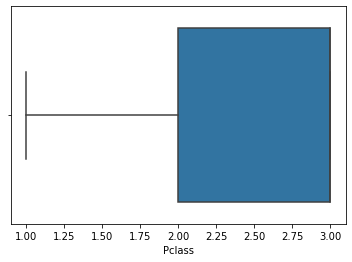

In [136]:
import seaborn as sns
sns.boxplot(x=data['Pclass'])

<AxesSubplot:xlabel='Age'>

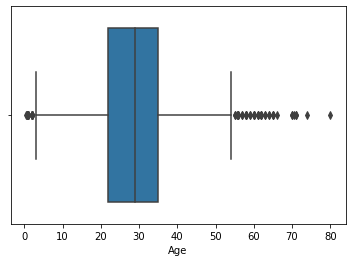

In [137]:
import seaborn as sns
sns.boxplot(x=data['Age'])

<AxesSubplot:xlabel='SibSp'>

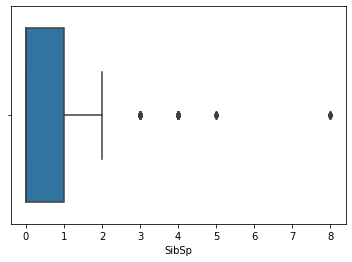

In [138]:
import seaborn as sns
sns.boxplot(x=data['SibSp'])

<AxesSubplot:xlabel='Fare'>

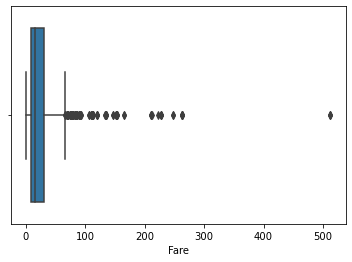

In [139]:
import seaborn as sns
sns.boxplot(x=data['Fare'])

In [140]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Survived     1.0000
Pclass       1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
dtype: float64


In [143]:
boston_df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(577, 6)

In [144]:
data1['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    29.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

# 6. Min Max scaling on the feature set

In [145]:
train = data1.copy()
test = data1.copy()

In [146]:
from sklearn.model_selection import train_test_split

features = train.drop(["Survived"], axis=1).columns

X = train[features].values
Y = train.Survived.values

x_train, x_val, t_train, t_val = train_test_split(X, Y, random_state=0)

train_df = pd.DataFrame(x_train, columns=features)
train_df["Survived"] = t_train
val_df = pd.DataFrame(x_val, columns=features)
val_df["Survived"] = t_val

train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3.0,28.0,0.0,0.0,7.8958,0
1,3.0,17.0,4.0,2.0,7.9250,1
2,3.0,30.0,1.0,0.0,16.1000,0
3,3.0,22.0,0.0,0.0,7.2500,0
4,2.0,45.0,0.0,0.0,13.5000,1


In [147]:
class MyClassifier:
    
    def __init__(self, n_features):
        self.n_features = n_features
        np.random.seed(0)
        self.w = np.random.normal(loc=0, scale=0.01, size=n_features + 1)
        self.losses = []
    
    def predict(self, x):
        y = sigmoid(np.sum(self.w[:-1]*x, axis=1) + self.w[-1])
        return y
    
    def loss(self, y, t):
        E = - np.sum(t * np.log(y) + (1-t) * np.log(1-y))
        return E
        
    def gradient(self, x, y, t):
        grad = np.zeros(self.w.shape[0])
        for d in range(self.w.shape[0]):
            if d != self.n_features:
                grad[d] = np.sum((y-t)*x[:, d])
            else:
                grad[d] = np.sum((y-t))
        return grad
        
    def update(self, eta, grad):
        w_next = np.zeros(self.w.shape) 
        for d in range(self.w.shape[0]):
            w_next[d] = self.w[d] - eta * grad[d]
        return w_next

    def learn(self, x, t, eta=0.000001, max_steps=100000, tol=0.00001):
        y = self.predict(x)
        for step in range(max_steps):
            error = self.loss(y, t)
            grad = self.gradient(x, y, t)
            self.w = self.update(eta, grad)
            self.losses.append(error)
            y = self.predict(x)
            error_next = self.loss(y, t)
            if (error - error_next) < tol:
                break
                
    def decide(self, y):
        decision = np.zeros(y.shape)
        decision[y >= 0.5] = 1
        decision[y < 0.5] = 0
        return decision.astype(np.int)
    
    def accuracy(self, y, t):
        N = y.shape[0]
        return 1/N * np.sum(1 - np.abs(t-y))
        
    def score(self, x, t):
        y = self.predict(x)
        y = self.decide(y)
        return self.accuracy(y, t)

In [148]:
def sigmoid(x):
    result = 1/(1+np.exp(-x))
    return result

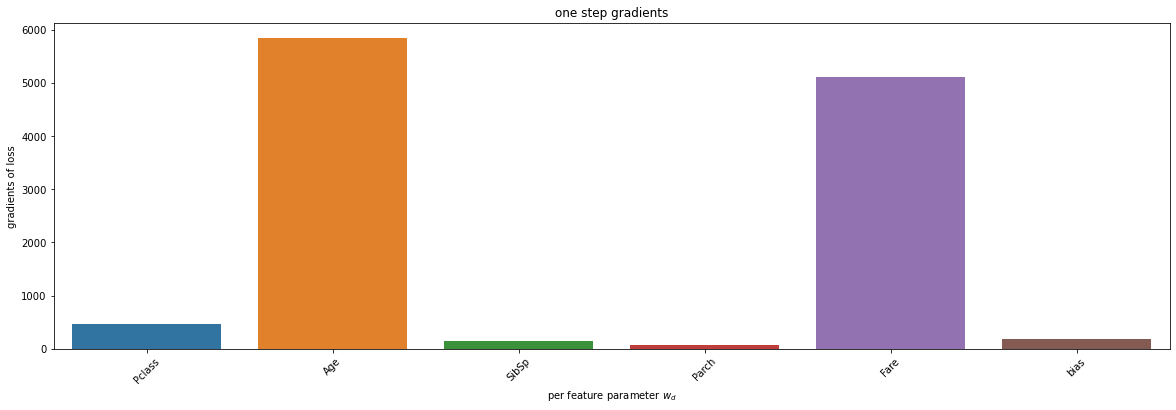

In [149]:
one_step_classifier = MyClassifier(n_features = len(features))
predictions = one_step_classifier.predict(x_train)
grad = one_step_classifier.gradient(x_train, predictions, t_train)

features_names = list(features) + ["bias"]

plt.figure(figsize=(20,6))
sns.barplot(x=features_names, y=grad)
plt.ylabel("gradients of loss")
plt.xlabel("per feature parameter $w_{d}$")
plt.title("one step gradients")
plt.xticks(rotation=45);

In [150]:
from sklearn.preprocessing import StandardScaler
# scale the train and test ages

scaler = StandardScaler()
train.Age = scaler.fit_transform(train.Age.values.reshape(-1,1))
test.Age = scaler.transform(test.Age.values.reshape(-1,1))

In [151]:
def get_grad_contributions(y, t, x_d):
    contributions = (y - t) * x_d
    return contributions

fare_contributions = get_grad_contributions(predictions, t_train, train_df.Fare.values)

In [152]:
# create some normally distributed samples:
original = np.random.normal(loc=0, scale=1, size=200)
# add an outlier
shifted = np.array(original.tolist() + [1000])
# comute the mean
print(np.mean(original))
print(np.mean(shifted))

0.04038757786597345
5.015311022752213


# 5. Trying to handle outliers

In [99]:
data['SibSp']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

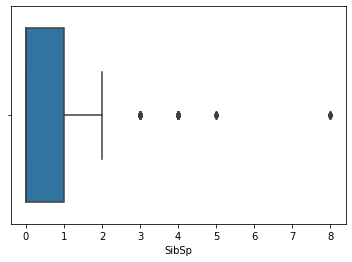

In [100]:
sns.boxplot(x = data['SibSp'])
plt.show()

In [101]:
data[['SibSp']].describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


In [102]:
data['SibSp'].quantile(0.25)

0.0

In [103]:
data['SibSp'].quantile(0.75)

1.0

In [105]:
IQR

PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             35.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64

In [113]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [114]:
lower_lim

PassengerId   -1002.75
Survived         -1.50
Pclass           -4.50
Age             -52.50
SibSp            -1.50
Parch             0.00
Fare            -46.50
Name: 0.75, dtype: float64

In [115]:
upper_lim

PassengerId    1671.25
Survived          2.50
Pclass            7.50
Age              87.50
SibSp             2.50
Parch             0.00
Fare             77.50
Name: 0.75, dtype: float64